# Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# Exploratory Data Analysis

From decription we can see that 'Date_of_Journey' is an object datatype and our model does not understand what the input for 'Date_of_Journey' actually mean 
so, we need to convert this datatype into time stamp so, we can use this column for proper predictions.

For converting into timestamp we require to_datetime to convert object datatype to datetime datatype.

* .dt_day -> method will extract only the day of that date
* .dt_month -> method will extract only the month of that date

In [11]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format = '%d/%m/%Y').dt.day

In [12]:
train_data['Journey_Month'] = pd.to_datetime(train_data['Date_of_Journey'], format = '%d/%m/%Y').dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [15]:
# Departure time is when a plane leaves the gate

# Extracting hours from Dep_Time
train_data['Dep_Hour'] = pd.to_datetime(train_data.Dep_Time, format = '%H:%M').dt.hour

# Extracting minutes from Dep_Time
train_data['Dep_Min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# We will now drop 'Dep_Time' table as we have extracted the values from it and we no longer require it in the training dataset
train_data.drop(['Dep_Time'], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# Arrival time is when a plane gets at the gate

# Extracting hours from the Arrival_Time
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting minutes from the Arrival_Time
train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

train_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
train_data['Duration'].head(15)

0      2h 50m
1      7h 25m
2         19h
3      5h 25m
4      4h 45m
5      2h 25m
6     15h 30m
7      21h 5m
8     25h 30m
9      7h 50m
10    13h 15m
11     2h 35m
12     2h 15m
13    12h 10m
14     2h 35m
Name: Duration, dtype: object

In [20]:
# Time taken by the palne to reach the destination is called Duration

# Converting Duration column into list and adding the missing values
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if(len(duration[i].split()) != 2): # Enter info if loop, if particular value does not contains both 'h' and 'm'
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m' # Adding '0m' if 'm' is missing
        else:
            duration[i] = '0h ' + duration[i] # Adding '0h' if 'h' is missing

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # Extract h value and convert to integer and appending to duration_hours

    # Here we are splitting the minutes using -1 index and then, from the splitted data we are extracting minute value and converting to integer
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [21]:
duration_hours[:5], duration_minutes[:5]

([2, 7, 19, 5, 4], [50, 25, 0, 25, 45])

In [22]:
# Adding Duration_Hours and Duration_Mins lists to the dataframe and dropping Duration column

train_data['Duration_Hours'] = duration_hours
train_data['Duration_Mins'] = duration_minutes

train_data.drop(['Duration'], axis = 1, inplace = True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


 # Handling Categorical Data
 
 We hanndle data in two ways by using **OneHotEncoder** and **LabelEncoder**
 
 * **Nominal Data** --> Data are not in any order --> **OneHotEncoder** is used
 * **Ordinal Data** --> Data are in order --> **LabelEncoder** is used

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
#We are now dropping the Jet Airways rows as its not in service in 2021

print(train_data.shape)

index_values = []

index_values.append(train_data[train_data['Airline'] == 'Jet Airways'].index)

for i in range(len(index_values)):
    train_data.drop(inplace = True, axis = 0, index = index_values[i])

train_data

(10682, 15)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [26]:
# We are now dropping the Jet Airways Business rows as its not in service in 2021

# Re-Initalizing index_values to 0
index_values = []

index_values.append(train_data[train_data['Airline'] == 'Jet Airways Business'].index)

for i in range(len(index_values)):
    train_data.drop(axis = 0, inplace = True, index = index_values[i])

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25


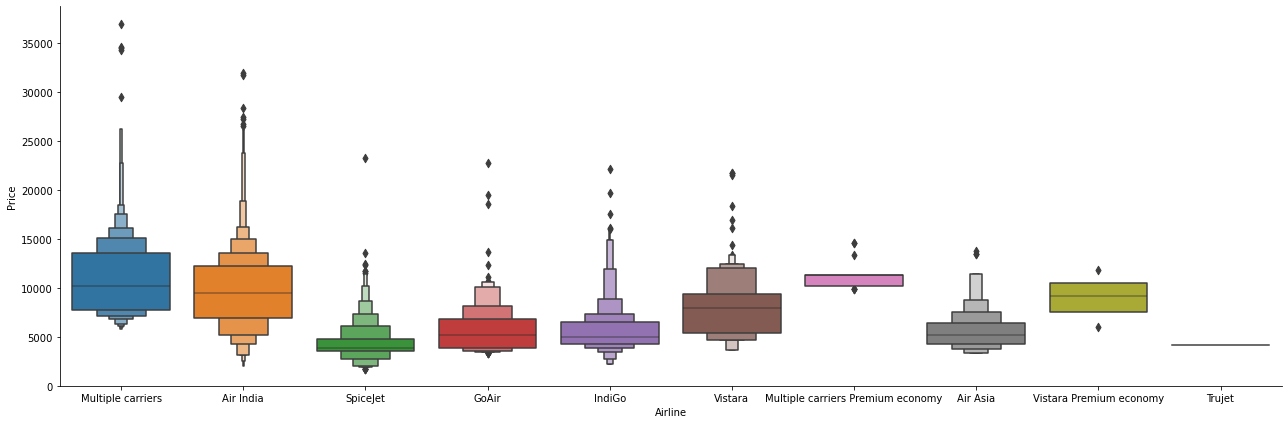

In [27]:
sns.catplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [28]:
# As Airline is Nominal Categorical Data we will perform OneHotEncoding

Airline = train_data[['Airline']]

Airline = pd.get_dummies(train_data['Airline'], drop_first = True)

Airline.head()

,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


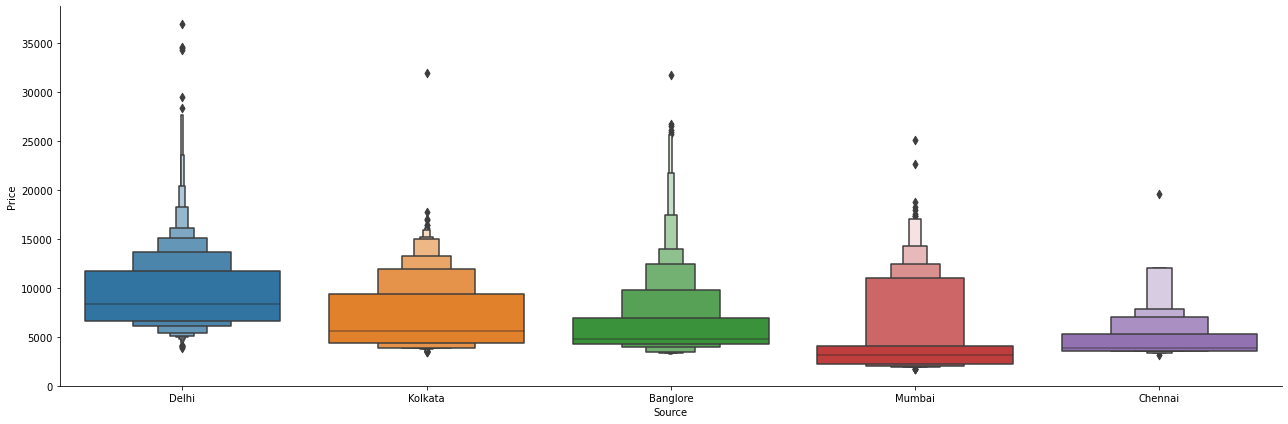

In [29]:
sns.catplot(x = 'Source', y = 'Price', data = train_data.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [30]:
# As Source is Nominal Categorical Data we will perform OneHotEncoding

Source = train_data[['Source']]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [31]:
train_data['Destination'].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical Data we will perform OneHotEncoding
Destination = train_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [33]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10677                BLR → DEL
10678                CCU → BLR
10679                CCU → BLR
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 6827, dtype: object

In [34]:
# Additional_Info contains 80% data as no_info
# Route and Total_Stops are related to each other we will drop Additional_Info and Route

train_data.drop(['Route', 'Additional_Info'], inplace = True, axis = 1)

In [35]:
train_data['Total_Stops'].value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
# As this is the Ordinal Categorical Type here we will perform LabelEncoder
# Here particular values are assigned with corresponding keys 

train_data.replace({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


In [37]:
# Dropping the columns Airline, Source and Destination columns as we have already Preprocessed it

train_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

train_data

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...
10677,0,3257,21,5,5,55,8,35,2,40
10678,0,4107,9,4,19,55,22,25,2,30
10679,0,4145,27,4,20,45,23,20,2,35
10681,0,12648,1,3,11,30,14,10,2,40


In [38]:
# Concatenating dataframe --> train_data + Airline + Source + Destinating

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [39]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0


In [40]:
data_train.shape

(6827, 28)

# Test Data

In [41]:
test_data = pd.read_excel('Test_set.xlsx')

In [42]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
test_data.shape

(2671, 10)

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [45]:
train_data.isnull().any()

Total_Stops       False
Price             False
Journey_Day       False
Journey_Month     False
Dep_Hour          False
Dep_Min           False
Arrival_Hour      False
Arrival_Min       False
Duration_Hours    False
Duration_Mins     False
dtype: bool

In [46]:
# Date_of_Journey
test_data["Journey_Day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_Month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_Hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_Min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_Hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_Min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_Hours"] = duration_hours
test_data["Duration_Mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)

index_values = []

index_values.append(test_data[test_data['Airline'] == 'Jet Airways'].index)

for i in range(len(index_values)):
    test_data.drop(inplace = True, axis = 0, index = index_values[i])

index_values = []

index_values.append(test_data[test_data['Airline'] == 'Jet Airways Business'].index)

for i in range(len(index_values)):
    test_data.drop(inplace = True, axis = 0, index = index_values[i])


print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       800
Kolkata     406
Banglore    355
Mumbai      136
Chennai      75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       800
Banglore     406
Delhi        226
Hyderabad    136
New Delhi    129
Kolkata       75
Name: Destination, dtype: int64


Shape of test data :  (1772, 26)


In [47]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,1,...,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,...,0,0,0,1,0,0,0,0,0,0


# Feature Selection

In [48]:
data_train.shape

(6827, 28)

In [49]:
# In training_columns_X we are not considering the Price column as its a dependent / target variable

X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Air India', 'GoAir', 'IndiGo', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [50]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
y = data_train.iloc[:, 1]

y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

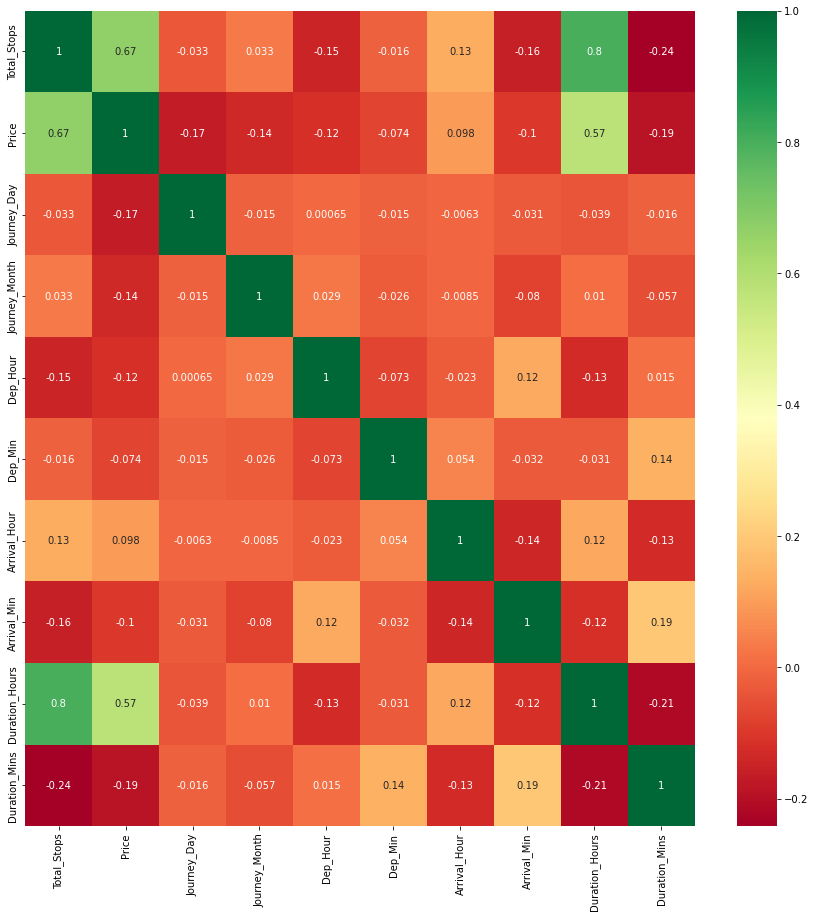

In [52]:
# Find correlation between the Dependent and Independent attributes

plt.figure(figsize = (15, 15))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [53]:
# Finding the important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()

selection.fit(X, y)

ExtraTreesRegressor()

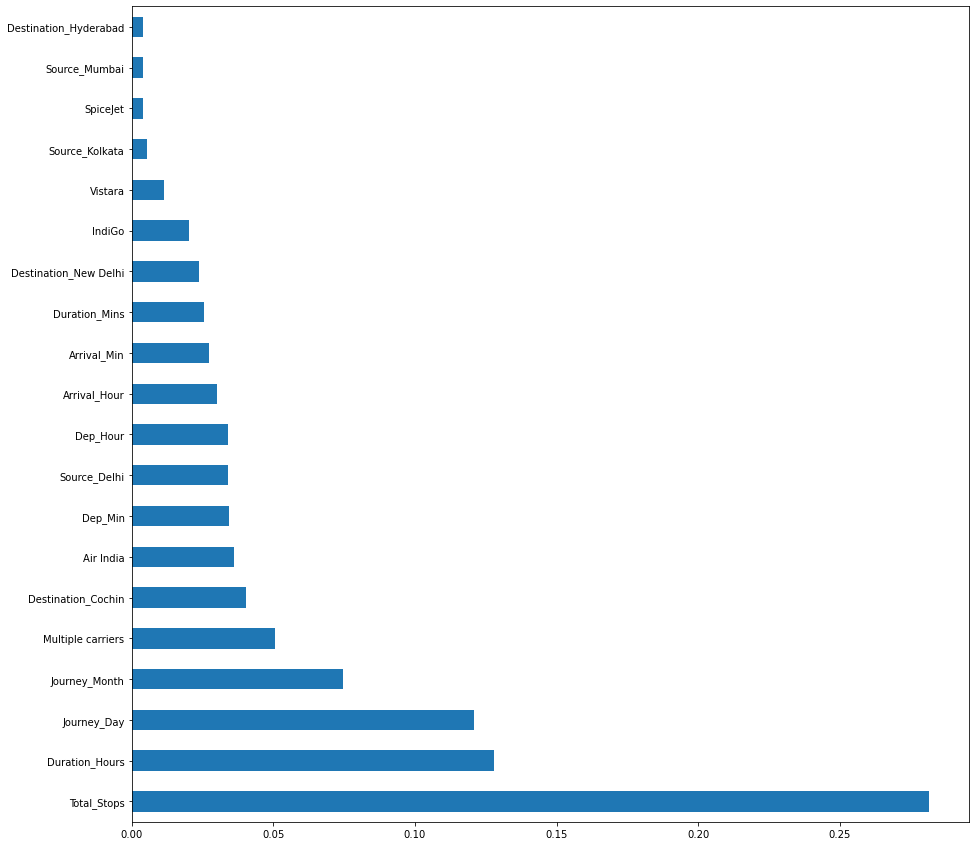

In [54]:
# Plotting the graph for important features for better visualization

plt.figure(figsize = (15, 15))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

# Fitting Model Using Random Forest Regressor

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [56]:
print(X_train.shape)

X_train.head()

(5461, 27)


,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3861,0,12,5,16,55,18,25,1,30,0,...,0,0,0,0,1,0,0,1,0,0
8558,2,27,3,21,30,19,15,21,45,1,...,0,0,1,0,0,1,0,0,0,0
4274,0,27,3,22,45,0,10,1,25,0,...,0,0,0,0,1,0,0,1,0,0
1572,0,21,3,9,30,12,5,2,35,0,...,0,1,0,0,0,0,0,0,1,0
1371,1,18,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0


In [57]:
print(X_test.shape)

X_test.head()

(1366, 27)


,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
289,2,12,3,17,25,16,20,22,55,1,...,0,0,0,0,0,0,0,0,0,1
4921,0,9,6,21,0,23,50,2,50,0,...,0,0,0,0,0,0,1,0,0,0
8972,1,1,6,7,0,12,55,5,55,0,...,0,0,1,0,0,1,0,0,0,0
8507,1,15,6,7,30,21,0,13,30,0,...,0,0,1,0,0,1,0,0,0,0
6486,1,27,6,23,30,4,35,5,5,0,...,0,0,1,0,0,1,0,0,0,0


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = rf_reg.predict(X_test)

In [60]:
rf_reg.score(X_train, y_train)

0.9724839250974758

In [61]:
rf_reg.score(X_test, y_test)

0.8326401299173287

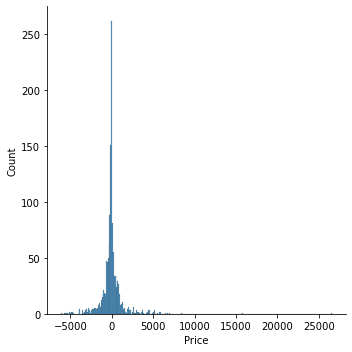

In [62]:
sns.displot(y_test - y_pred)
plt.show()

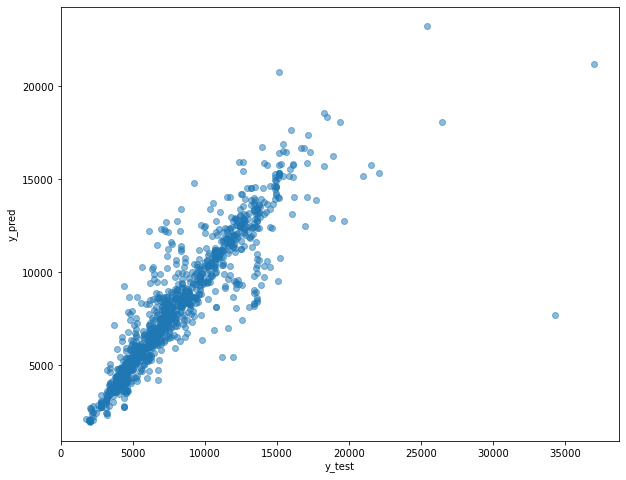

In [63]:
plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [64]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 746.8846022072323
Mean Squared Error (MSE): 2402184.776851239
Root Mean Squared Error (RMSE): 1549.8983117776595


In [65]:
print(metrics.r2_score(y_test, y_pred))

0.8326401299173287


# Hyper-Parameter Tuning

* Choose the following method for hyperparameter tuning
    * 1. RandomizedSearchCV
    * 2. GridSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Randomized Search CV

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to be considered at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of smaples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [69]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2,
random_state = 15, n_jobs = 1)

In [70]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   4.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  22.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  21.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=15, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [72]:
prediction = rf_random.predict(X_test)

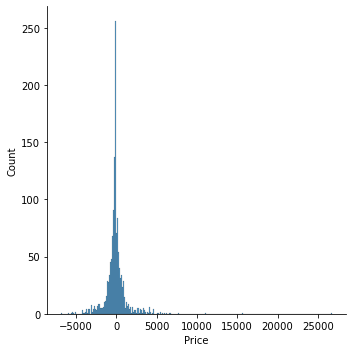

In [73]:
sns.displot(y_test - prediction)
plt.show()

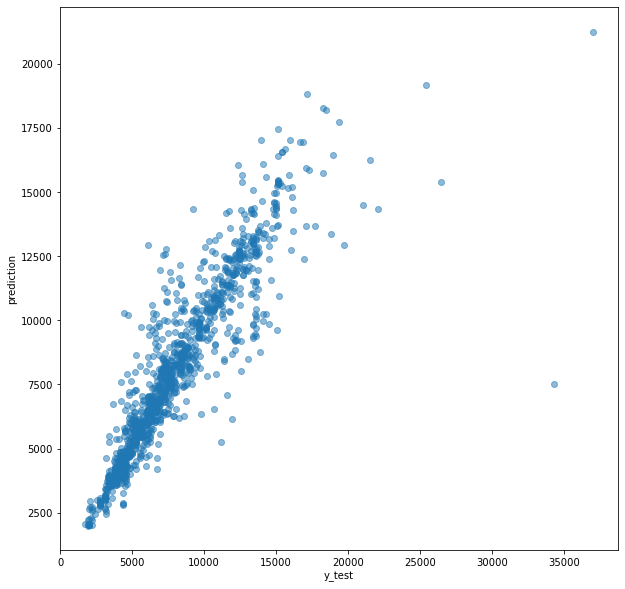

In [74]:
plt.figure(figsize = (10, 10))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [75]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, prediction))

print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, prediction))

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error (MAE): 786.7502395155857
Mean Squared Error (MSE): 2460479.1874734303
Root Mean Squared Error (RMSE): 1568.5914660845986


# Saving the model for reuse

In [76]:
import pickle

file = open('flight_model.pkl', 'wb')

# Dump information into that file
pickle.dump(rf_random, file)

In [77]:
model = open('flight_model.pkl', 'rb')
random_forest = pickle.load(model)

In [78]:
y_prediction = random_forest.predict(X_test)

In [79]:
metrics.r2_score(y_test, y_prediction)

0.8285787666607253